### 모의고사 1번  

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import string 
import re 

from konlpy.tag import Okt, Twitter

In [125]:
def text_cleansing(txt):
    
    txt = txt.lower()            # 소문자 
    txt = txt.translate(str.maketrans('','', string.punctuation))  #  구두점(마침표, 쉼표)
    txt = txt.rstrip("\n")       # 개행문자
    nonum = re.compile('[^0-9]') # 숫자제거 
    txt = "".join(nonum.findall(txt)) 
    txt = txt.strip()            # 공백제거 

    return txt 

texts = ['.,대한A11BC민국 한국', '  #!!@#$%$%^&&22CDE.,\n']

docs= []
for txt in texts:
    docs.append(text_cleansing(txt))
    
docs

['대한abc민국 한국', 'cde']

In [126]:
# 한글만 뽑기 : 한방
docs = []
for txt in texts:
    docs.append(re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", txt))
    
docs    

['대한민국 한국', '  ']

### 실전 데이터 

In [131]:
f = open('datafiles/영화 기생충_review.txt', 'r', encoding='cp949')   # 옵션 : euc-kr, utf-8 
docs = f.readlines()    # readline : 한줄로 읽기, realines : 리스트 
print(len(docs))
print(docs[:10])

1790
['별1개  준 사람들은   나베당임\n', '역쉬\n', '영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..\n', '지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!\n', '대단한 영화. 몰입력 장난아님. 후아\n', '그닥\n', '칸하고 안맞나봄.\n', '봉준호식의 코메디와 사회비판 페이소스\n', '좋았습니다\n', '군더더기 없이 깔끔한 영화, 지금도 영화가 주는 메세지를 생각하는 중입니다\n']


In [132]:
docs_clean = []
for txt in docs:
    docs_clean.append(text_cleansing(txt))
    
print(docs_clean[:10])

['별개  준 사람들은   나베당임', '역쉬', '영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다', '지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음  bomb', '대단한 영화 몰입력 장난아님 후아', '그닥', '칸하고 안맞나봄', '봉준호식의 코메디와 사회비판 페이소스', '좋았습니다', '군더더기 없이 깔끔한 영화 지금도 영화가 주는 메세지를 생각하는 중입니다']


### 단어별 언급 건수 집계

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()

res = pd.DataFrame(vector.fit_transform(docs_clean).toarray(), 
                   columns=vector.get_feature_names_out())
print(res.shape)
res.sample(5)

(1790, 6832)


,age,an,avant,black,bomb,b급,b급영화에,comedy,do,dor,...,힘든,힘든영화,힘들게,힘들다,힘들었다,힘들지,힘들지만,힘듬,힘이,힘이다
1671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
res['봉준호'].sum()  # R과 일치

78

In [213]:
#!pwd
#!cat 'datafiles/영화 기생충_사전.txt' # 리눅스 명령어 인코딩 깨짐 

In [176]:
# 단어 사전 
f = open('datafiles/영화 기생충_사전.txt', 'r', encoding='cp949')   # 옵션 : euc-kr, utf-8 
dic_data = f.readlines()  

dic_data_clean = []
for txt in dic_data:
    dic_data_clean.append(text_cleansing(txt))
    
dic_data_clean 

['기생충',
 '봉준호',
 '송강호',
 '기택',
 '이선균',
 '박사장',
 '조여정',
 '연교',
 '최우식',
 '기우',
 '박소담',
 '기정',
 '장혜진',
 '충숙',
 '이정은',
 '이지혜',
 '박서준']

In [202]:
res_dic = {}

for d in dic_data_clean:
    try:
        res_dic[d] = res[d].sum()
    except:  # 기택 키워드 없음
        pass 
    
res_summary = pd.DataFrame({'keyword':res_dic.keys(), 'count':res_dic.values()})
res_summary.sort_values(by='count', ascending=False).reset_index(drop=True)

,keyword,count
0,봉준호,78
1,송강호,29
2,기생충,17
3,이선균,10
4,조여정,10
5,최우식,4
6,이정은,3
7,박소담,2
8,박사장,1
9,기정,1


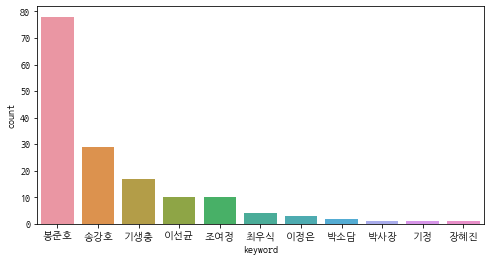

In [211]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x='keyword', y='count', data=res_summary, 
            order=res_summary.sort_values(by='count',ascending=False)['keyword'] );

In [224]:
# 명사를 추출하여 워드클라우드 그리기
from konlpy.tag import Twitter 

twitter = Twitter()

malist = []
for doc in docs_clean:
    mals = twitter.nouns(doc)
    for mal in mals:
        if len(mal) > 1:
            malist.append(mal)

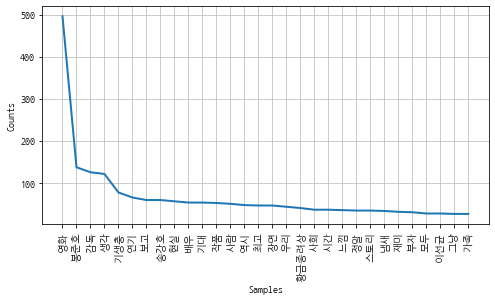

In [227]:
from nltk import Text

plt.figure(figsize=(8,4))
cine = Text(malist, name='cine')
cine.plot(30)
plt.show()

In [252]:
!find / -name "Nanu*.ttf"

/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf


In [242]:
malist[:5]

['별개', '사람', '역쉬', '영화', '가슴']

In [ ]:
# 워드클라우드 메뉴얼 (출력)
# https://lovit.github.io/nlp/2018/04/17/word_cloud/
# https://donghae0230.tistory.com/122 (간단 참조)

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf'

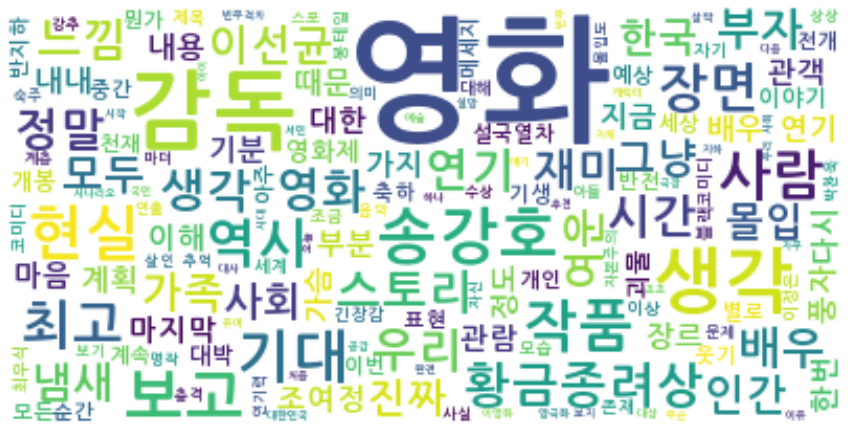

In [263]:
# 방법 1: 단어 리스트로 그리기 generate : 30건 이상만 나오게 할 수 없다 ㅠ.ㅜ

wordcloud = WordCloud(font_path=font_path, background_color='white', stopwords=['봉준호', '기생충'])  # 제외 단어 
wc = wordcloud.generate(' '.join(malist))  # 리스트를 텍스트로 변환 
plt.figure(figsize = (15 , 10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [297]:
import nltk
nltk.download('punkt')

text = nltk.Text(nltk.word_tokenize('object has no attribute'))  # 텍스트 문장 와야 함 
text.tokens  # >>['object', 'has', 'no', 'attribute']
text.vocab()  # >> FreqDist({'object': 1, 'has': 1, 'no': 1, 'attribute': 1})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['object', 'has', 'no', 'attribute']

In [302]:
# 방법 2 : 딕셔너리로 그리기 --> 30개 이상만 입력시     
sentence = ' '.join(malist)
text = nltk.Text(nltk.word_tokenize(sentence))  # 문장으로 입력 
keywords = text.vocab()  # 
keywords   # 사전 형식 객체 

FreqDist({'영화': 497, '봉준호': 138, '감독': 126, '생각': 122, '기생충': 78, '연기': 66, '보고': 60, '송강호': 60, '현실': 57, '배우': 54, ...})

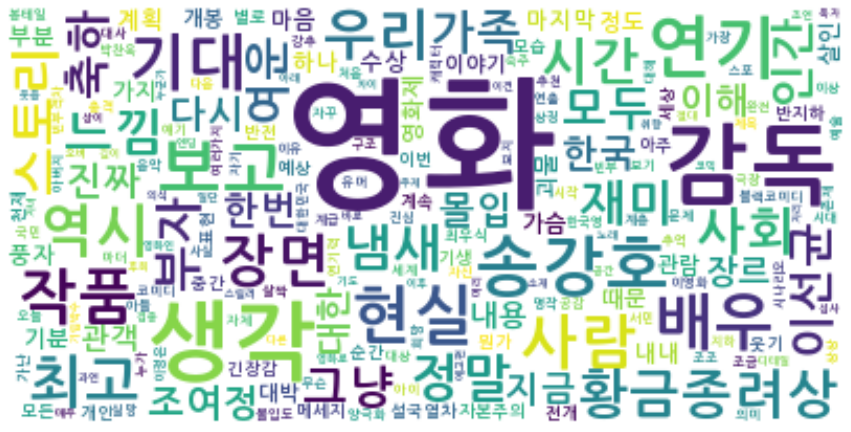

In [311]:
# wordcloud.generate_from_frequencies는 stopwords가 안 먹음 ㅠ.ㅜ 
keywords.pop('봉준호')
keywords.pop('기생충')

wordcloud = WordCloud(font_path=font_path, background_color='white')
wc = wordcloud.generate_from_frequencies(keywords) 
plt.figure(figsize = (15 , 10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show() 

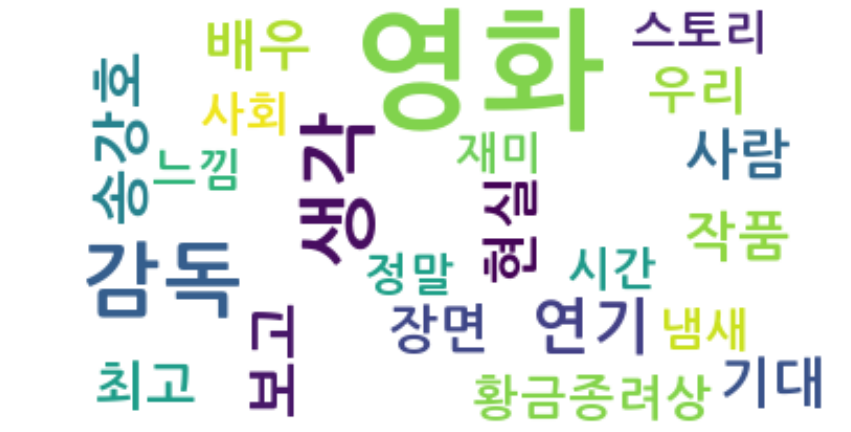

In [337]:
# 30개 미만 keyword 빼기 
under_30 = []
for key, value in keywords.items():
    if value < 30:
        under_30.append(key)
        
# 해당 키워드 제외 : pop
[ keywords.pop(key) for key in under_30 ]

keywords.pop('역시') # stopwords
keywords.pop('부자')

wordcloud = WordCloud(font_path=font_path, background_color='white')
wc = wordcloud.generate_from_frequencies(keywords) 
plt.figure(figsize = (15 , 10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [334]:
# (옵션) 방법 3: collection으로 사전 만들기 (nltk대신)
import collections 

# 사전 형식으로 집계 
c = collections.Counter()
for mal in malist:
    if len(mal) > 1:
        c[mal] += 1
        
# 30개 미만 keyword 빼기 
under_30 = []
for key, value in c.items():
    if value < 30:
        under_30.append(key)
        
#under_30
# 해당 키워드 제외 : pop
[ c.pop(key) for key in under_30 ]

c 

Counter({'사람': 51,
         '영화': 497,
         '감독': 126,
         '작품': 53,
         '느낌': 36,
         '봉준호': 138,
         '사회': 37,
         '생각': 122,
         '보고': 60,
         '시간': 37,
         '정말': 35,
         '최고': 47,
         '송강호': 60,
         '역시': 48,
         '배우': 54,
         '장면': 47,
         '현실': 57,
         '기생충': 78,
         '연기': 66,
         '스토리': 35,
         '황금종려상': 41,
         '우리': 44,
         '재미': 32,
         '냄새': 34,
         '기대': 54,
         '부자': 31})

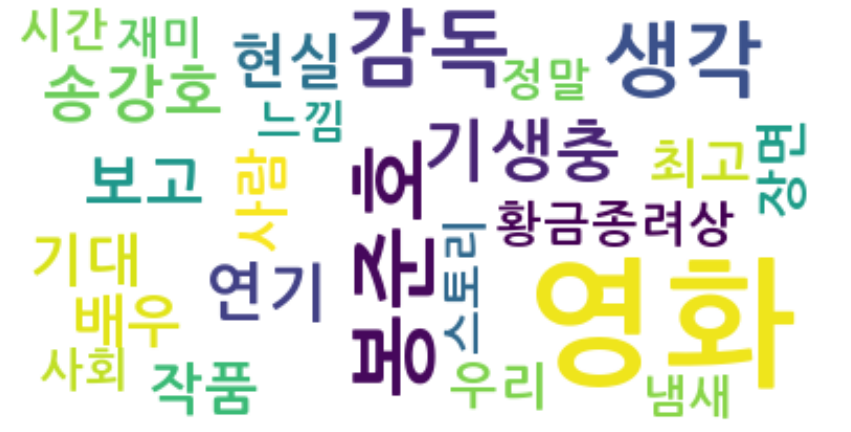

In [335]:
# wordcloud.generate_from_frequencies는 stopwords가 안 먹음 ㅠ.ㅜ 
c.pop('역시')
c.pop('부자')

wordcloud = WordCloud(font_path=font_path, background_color='white')
wc = wordcloud.generate_from_frequencies(c) 
plt.figure(figsize = (15 , 10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show() 

### 연관성 분석 : ADP교재 583쪽, 파이썬 교재 360쪽 

In [350]:
# 사전 단어 중, DM에 포함된 단어만 선별
col_res = [ col for col in dic_data_clean if col in res.columns ]
col_res

['기생충', '봉준호', '송강호', '이선균', '박사장', '조여정', '최우식', '박소담', '기정', '장혜진', '이정은']

In [352]:
assocs = res[col_res]
print(assocs.isnull().sum())
assocs.sample(5)

기생충    0
봉준호    0
송강호    0
이선균    0
박사장    0
조여정    0
최우식    0
박소담    0
기정     0
장혜진    0
이정은    0
dtype: int64


,기생충,봉준호,송강호,이선균,박사장,조여정,최우식,박소담,기정,장혜진,이정은
244,0,0,0,0,0,0,0,0,0,0,0
1300,0,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,0
1364,0,0,0,0,0,0,0,0,0,0,0
1639,0,0,0,0,0,0,0,0,0,0,0


In [360]:
# 특정 키워드와 연관성 분석 시행 
assocs = assocs.applymap(lambda x: False if x == 0 else True)
assocs.sample(3)

,기생충,봉준호,송강호,이선균,박사장,조여정,최우식,박소담,기정,장혜진,이정은
835,False,False,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False,False,False
1137,False,False,False,False,False,False,False,False,False,False,False


In [365]:
from mlxtend.frequent_patterns import apriori 

freq_set = apriori(assocs, min_support=0.00001, use_colnames=True)
freq_set['len'] = freq_set['itemsets'].apply(lambda x: len(x))
freq_set.query("len > 1").sort_values(by='support', ascending=False)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,len
12,0.002235,"(송강호, 봉준호)",2
13,0.001117,"(송강호, 이선균)",2
11,0.000559,"(봉준호, 기생충)",2
14,0.000559,"(송강호, 조여정)",2
15,0.000559,"(장혜진, 이선균)",2
16,0.000559,"(이정은, 조여정)",2
17,0.000559,"(최우식, 박소담)",2


---

### 제 2회 

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import string 
import re 

from konlpy.tag import Okt, Twitter

import warnings 
warnings.filterwarnings('ignore')

In [372]:
def text_cleansing(txt):
    
    txt = txt.lower()            # 소문자 
    txt = txt.translate(str.maketrans('','', string.punctuation))  #  구두점(마침표, 쉼표)
    txt = txt.rstrip("\n")       # 개행문자
    txt = txt.strip()            # 공백제거 
    nonum = re.compile('[^0-9]') # 숫자제거 
    txt = "".join(nonum.findall(txt)) 

    return txt 

In [375]:
# 파일 읽기
f = open('datafiles/연설문.txt', 'r', encoding='cp949')   # 옵션 : euc-kr, utf-8 
docs = f.readlines()    # readline : 한줄로 읽기, realines : 리스트 
print(len(docs))
print(docs[:5])

31
['존경하고 사랑하는 국민 여러분, 감사합니다.\n', '국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.\n', '\n', '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.\n', '\n']


In [377]:
# 전처리 
docs_clean = []
for txt in docs:
    t = text_cleansing(txt)
    if len(t) > 1: # 한글자 이상
        docs_clean.append(t)
    
print(docs_clean[:5])

['존경하고 사랑하는 국민 여러분 감사합니다', '국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다 저는 오늘 대한민국 제대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다', '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다', '함께 선거를 치른 후보들께 감사의 말씀과 심심한 위로를 전합니다 이번 선거에서는 승자도 패자도 없습니다 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다', '존경하는 국민 여러분']


In [379]:
# 명사를 추출하여 워드클라우드 그리기
from konlpy.tag import Twitter 

twitter = Twitter()

malist = []
for doc in docs_clean:
    mals = twitter.nouns(doc)
    for mal in mals:
        if len(mal) > 1:
            malist.append(mal)     

In [382]:
ser = pd.Series(malist).value_counts()
ser

국민      19
대통령     16
우리       8
대한민국     8
여러분      5
        ..
승화       1
마침내      1
하나       1
전국       1
정례       1
Length: 177, dtype: int64

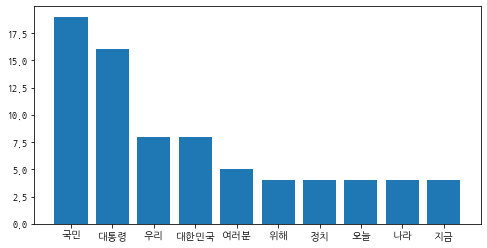

In [392]:
plt.figure(figsize=(8,4))
plt.bar(ser[:10].index, ser[:10]);

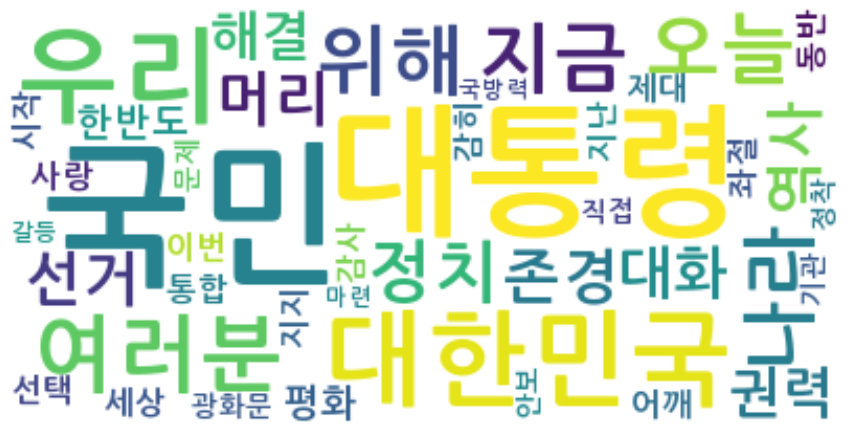

In [393]:
# 워드클라우드 
import collections 

# 사전 형식으로 집계 
c = collections.Counter()
for mal in malist:
    if len(mal) > 1:
        c[mal] += 1

# 2개 미만 keyword 빼기 
under_2 = []
for key, value in c.items():
    if value < 2:
        under_2.append(key)
        
[ c.pop(key) for key in under_2 ]
# wordcloud.generate_from_frequencies는 stopwords가 안 먹음 ㅠ.ㅜ 
#c.pop('역시')
#c.pop('부자')

wordcloud = WordCloud(font_path=font_path, background_color='white')
wc = wordcloud.generate_from_frequencies(c) 
plt.figure(figsize = (15 , 10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show() 

--- 

### 3장 



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import string, re 

from konlpy.tag import Twitter, Okt

import warnings
warnings.filterwarnings('ignore')

In [84]:
def text_cleansing(txt):
    
    txt = txt.lower()            # 소문자 
    txt = txt.translate(str.maketrans('','', string.punctuation))  #  구두점(마침표, 쉼표)
    #txt = txt.rstrip("\n")       # 개행문자 
    nonum = re.compile('[^0-9]') # 숫자제거 
    txt = "".join(nonum.findall(txt)) 
    txt = txt.strip()            # 공백제거

    # 한글만 한방 추출(테스트 필요) re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", txt)

    return txt 

In [27]:
f = open('datafiles/공구 블로그 댓글.txt', 'r', encoding='cp949')
docs = f.readlines()
print(len(docs))
print(docs[:10])

226
['Date\tGood\tHate\tContent\n', '"2014.02.14\t"\t71\t0\t두두월드님.담번엔 실리콘스티머공구도부탁요.\n', '"2014.02.14\t"\t118\t0\t김다미돈까스 공구 일정 궁금해요\n', '"2014.02.14\t"\t42\t0\t빌보나 헹켈 커트러리요~\n', '"2014.02.14\t"\t84\t0\t드롱기 아이코다 빈티지 공구 부탁드려요..ㅠㅠ\n', '"2014.02.14\t"\t145\t0\t폴란드그릇 다른패턴으로공구희망유\n', '"2014.02.13\t"\t112\t0\t러버메이드 밀대청소기\n', '"2014.02.13\t"\t234\t0\t예카는 진공포장기공구없나욤?기가매키게좋은대욤!\n', '"2014.02.13\t"\t67\t0\t다이슨 청소기 다시 한번 더 공구해주세요~~\n', '"2014.02.13\t"\t122\t0\t진짜 원하는 공구예요. 양키캔들이요. \n']


In [28]:
docs_clean = []
for doc in docs:
    docs_clean.append(text_cleansing(doc))
print(docs_clean[:10])  

['date\tgood\thate\tcontent', '두두월드님담번엔 실리콘스티머공구도부탁요', '김다미돈까스 공구 일정 궁금해요', '빌보나 헹켈 커트러리요', '드롱기 아이코다 빈티지 공구 부탁드려요ㅠㅠ', '폴란드그릇 다른패턴으로공구희망유', '러버메이드 밀대청소기', '예카는 진공포장기공구없나욤기가매키게좋은대욤', '다이슨 청소기 다시 한번 더 공구해주세요', '진짜 원하는 공구예요 양키캔들이요']


In [18]:
docs_clean22 = []
for doc in docs:
    docs_clean22.append( re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", doc) )
print(docs_clean22[:10])  

['', '두두월드님담번엔 실리콘스티머공구도부탁요', '김다미돈까스 공구 일정 궁금해요', '빌보나 헹켈 커트러리요', '드롱기 아이코다 빈티지 공구 부탁드려요ㅠㅠ', '폴란드그릇 다른패턴으로공구희망유', '러버메이드 밀대청소기', '예카는 진공포장기공구없나욤기가매키게좋은대욤', '다이슨 청소기 다시 한번 더 공구해주세요', '진짜 원하는 공구예요 양키캔들이요 ']


###### (매우중요) 사용자 단어 추가

In [29]:
# 사용자 사전에 단어 추가 
# https://wikidocs.net/92961
f = open('datafiles/사전.txt', 'r', encoding='cp949')
dictionary = f.readlines()
dictionary = [ d.strip() for d in dictionary ]  # 개행문자 

print(len(dictionary))
print(dictionary[:10])

229
['공구', '실리콘스티머', '김다미돈까스', '빌보', '헹켈', '커트러리', '드롱기', '아이코다', '빈티지', '폴란드그릇']


In [32]:
#!pip install customized_konlpy
from ckonlpy.tag import Twitter 
twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다')

['은', '경이', '는', '사무실', '로', '갔습니다']

In [34]:
twitter.add_dictionary('은경이', 'Noun')
twitter.morphs('은경이는 사무실로 갔습니다')

['은경이', '는', '사무실', '로', '갔습니다']

In [35]:
twitter.morphs('두두월드님담번엔 실리콘스티머공구도부탁요')

['두두', '월드', '님담번', '엔', '실리콘', '스티', '머공', '구도', '부탁', '요']

In [37]:
twitter.add_dictionary('실리콘스티머', 'Noun')
twitter.morphs('두두월드님담번엔 실리콘스티머공구도부탁요')  # ---> 굿! 

['두두', '월드', '님담번', '엔', '실리콘스티머', '공구', '도', '부탁', '요']

In [38]:
# 단어추가 
for kwd in dictionary:
    twitter.add_dictionary(kwd, 'Noun')

In [53]:
### 형용사 추출
# https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html
words = []
for doc in docs_clean:
    for d in twitter.pos(doc):  # 리스트 in 튜플 >> for순회해서 리스트 풀기 
        words.append(d)         # 튜플만 words에 넣기 

In [57]:
words_df = pd.DataFrame(words, columns=['kwd', '품사'])
words_df.tail()

,kwd,품사
1014,내주,Noun
1015,는,Josa
1016,건,Noun
1017,스타우브,Noun
1018,던디,Noun


In [58]:
words_df['품사'].value_counts()

Noun              776
Josa               95
Verb               52
Eomi               50
Adjective          21
KoreanParticle      8
Alpha               7
Suffix              4
Adverb              3
Modifier            2
Determiner          1
Name: 품사, dtype: int64

In [59]:
words_df.query(" 품사 == 'Adjective'")['kwd'].value_counts() # 형용사

있나요     2
원해요     2
궁금해요    1
편한      1
없으세요    1
있       1
있으      1
맛있는     1
없나요     1
없으      1
안될까     1
없나      1
없는      1
입니다     1
같은거     1
안되나요    1
원하는     1
좋은대     1
어때      1
Name: kwd, dtype: int64

In [60]:
words_df.query(" 품사 == 'Adverb'")['kwd'].unique() # 부사 

array(['다', '딱'], dtype=object)

In [61]:
words_df.query(" 품사 == 'Verb'")['kwd'].unique() # 동사 

array(['드려요', '기가매', '먹고', '주세요', '삶는', '짜는', '놓쳤는데', '벤', '될까', '합니다',
       '열렸던', '할까', '메워', '뜨면', '질른다', '는건', '써', '드려도', '되나요', '오네',
       '뜨구', '보셔', '넘', '쓴다', '할', '어려울까', '없애', '볼까', '안하'], dtype=object)

### 명사 2글자 이상 추출, 시각화

In [76]:
malist = []

stopwords = ['이요', '다시']  # 불용어 샘플  --> 실전에는 옵션!!! 

for doc in docs_clean:
    for mal in twitter.nouns(doc):
        if len(mal) > 1 and mal not in stopwords:
            malist.append(mal)
        
malist[:10]        

['두두', '월드', '님담번', '실리콘스티머', '공구', '부탁', '김다미돈까스', '공구', '일정', '빌보']

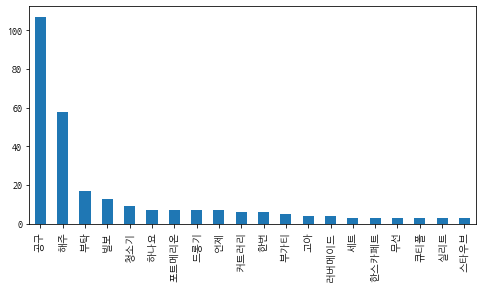

In [77]:
ser = pd.Series(malist).value_counts().iloc[:20]

plt.figure(figsize=(8,4))
ser.plot(kind='bar');

---
### 4번 과제

In [91]:
f = open('datafiles/instagram_태교여행.txt', 'r', encoding='cp949')
docs = f.readlines()
print(len(docs))
print(docs[:3])

198
['쇼퍼걸  예비맘 태교여행 괌 임신6개월 배 부르게 밥 먹고 오빠 생일선물 산다고 다니다가 뜻밖에 내 가방도 득템 가방더 안실려고했는데   앙  기분 완전 좋음   이제 렌트하고 돌아댕기야지  \n', '태교여행  몰디브 한식을 꼭 먹어야 했었던 임산부 땜에 남편은 몰디브에서도 김치찌개를 끓였어야 했다.\n', '하음이가 사랑이 뱃속에 있은 지 임신4개월째 여행가서 찍은 사진. 여행이라고는 하지만 온통 머릿속은 사랑이 건강과 더불어 6개월 후 빛을 볼 하음이에 쏠려 있어 시드니의 분위기와 풍경보다는 우리 둘의 시간에 집중했던.  sidney  부부  태교여행  호주  시드니  오페라하우스  아이고 멋져라  임신4개월\n']


In [92]:
docs_clean = []
for doc in docs:
    docs_clean.append(text_cleansing(doc))    
    
print(docs_clean[:3])

['쇼퍼걸  예비맘 태교여행 괌 임신개월 배 부르게 밥 먹고 오빠 생일선물 산다고 다니다가 뜻밖에 내 가방도 득템 가방더 안실려고했는데   앙  기분 완전 좋음   이제 렌트하고 돌아댕기야지', '태교여행  몰디브 한식을 꼭 먹어야 했었던 임산부 땜에 남편은 몰디브에서도 김치찌개를 끓였어야 했다', '하음이가 사랑이 뱃속에 있은 지 임신개월째 여행가서 찍은 사진 여행이라고는 하지만 온통 머릿속은 사랑이 건강과 더불어 개월 후 빛을 볼 하음이에 쏠려 있어 시드니의 분위기와 풍경보다는 우리 둘의 시간에 집중했던  sidney  부부  태교여행  호주  시드니  오페라하우스  아이고 멋져라  임신개월']


In [107]:
# 사용자 단어 추가 : 1건 
from ckonlpy.tag import Twtter
twitter.add_dictionary('태교여행', 'Noun')
twitter.add_dictionary('인스타그램', 'Noun')
# twitter.pos("태교여행좋았어")  -> 이미 사전에 추가되어 있음

ImportError: cannot import name 'Twtter' from 'ckonlpy.tag' (/opt/conda/lib/python3.8/site-packages/ckonlpy/tag/__init__.py)

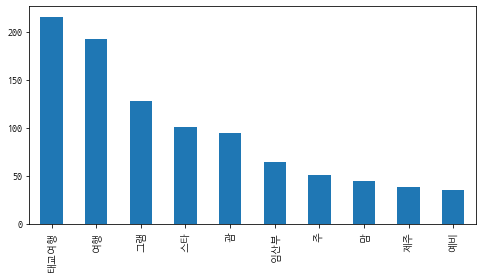

In [109]:
# 명사 출현빈도 10위 까지 막대 그래프 시각화
words = []

for doc in docs_clean:
    for mal in twitter.nouns(doc):
        #if len(mal) > 1:  # 괌이 있어서 한글자도 포함 
        words.append(mal)
            
ser = pd.Series(words)
plt.figure(figsize=(8,4))
ser.value_counts().iloc[:10].plot(kind='bar');

In [ ]:
# 워드클라우드 : 20개이상 단어만 

In [121]:
import collections 

c = collections.Counter()
for word in words:
    c[word] += 1

In [122]:
c.most_common()  # 상위건수 보기

[('태교여행', 216),
 ('여행', 193),
 ('그램', 128),
 ('스타', 101),
 ('괌', 95),
 ('임산부', 64),
 ('주', 51),
 ('맘', 45),
 ('제주', 38),
 ('예비', 35),
 ('만삭', 32),
 ('제주도', 31),
 ('임신', 30),
 ('사진', 29),
 ('부부', 29),
 ('일상', 25),
 ('비치', 25),
 ('사랑', 23),
 ('추억', 23),
 ('가족', 22),
 ('태교', 20),
 ('호텔', 20),
 ('셀프', 20),
 ('우리', 18),
 ('투몬', 17),
 ('개월', 16),
 ('힐링', 16),
 ('오키나와', 16),
 ('셀', 16),
 ('럽', 16),
 ('바다', 15),
 ('소통', 14),
 ('신혼부부', 14),
 ('내', 13),
 ('중', 13),
 ('세부', 13),
 ('더', 12),
 ('겨울', 12),
 ('셀카', 12),
 ('아들', 12),
 ('나', 11),
 ('닭띠맘', 11),
 ('아빠', 11),
 ('리조트', 11),
 ('맛', 11),
 ('이제', 10),
 ('먹방', 10),
 ('맛집', 10),
 ('마지막', 10),
 ('신혼', 10),
 ('펜션', 10),
 ('행복', 9),
 ('날씨', 9),
 ('휴가', 9),
 ('하와이', 9),
 ('월', 9),
 ('날', 9),
 ('다낭', 9),
 ('오늘', 8),
 ('대만', 8),
 ('곳', 8),
 ('투어', 8),
 ('밤', 8),
 ('수영장', 8),
 ('리', 8),
 ('망고', 8),
 ('감성', 8),
 ('남편', 7),
 ('고', 7),
 ('찍기', 7),
 ('커플', 7),
 ('팔이', 7),
 ('스냅', 7),
 ('주년', 7),
 ('라오', 7),
 ('해변', 7),
 ('맥주', 7),
 ('베트남', 7),
 ('맞팔', 7),

In [123]:
n = 20
delete_kwd = []
for key, value in c.items():
    if value < 20:
        delete_kwd.append(key)
        
_ = [ c.pop(key) for key in delete_kwd ]

In [127]:
!find / -name '*Nanum*.ttf'

/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf


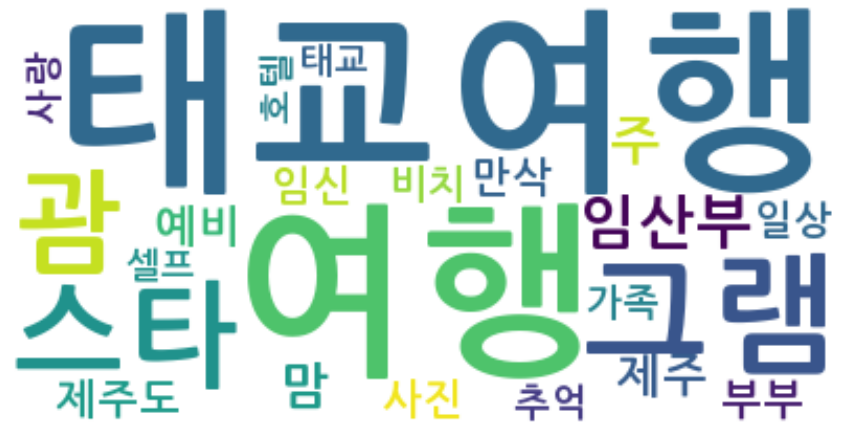

In [128]:
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf'
wc = WordCloud(font_path=font_path, background_color='white').generate_from_frequencies(c)
plt.figure(figsize=(15,10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
----

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import string 
import re 

from konlpy.tag import Okt, Twitter
from wordcloud import WordCloud

def text_cleansing(txt):
    
    txt = txt.lower()            # 소문자 
    txt = txt.translate(str.maketrans('','', string.punctuation))  #  구두점(마침표, 쉼표)
    #txt = txt.rstrip("\n")       # 개행문자 
    nonum = re.compile('[^0-9]') # 숫자제거 
    txt = "".join(nonum.findall(txt)) 
    txt = txt.strip()            # 공백제거

    # 한글만 한방 추출(테스트 필요) re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", txt)

    return txt 

#texts = ['.,대한A11BC민국 한국', '  #!!@#$%$%^&&22CDE.,\n']

f = open('datafiles/영화 기생충_review.txt', 'r', encoding='cp949')   # 옵션 : euc-kr, utf-8 
docs = f.readlines()    # readline : 한줄로 읽기, realines : 리스트 
print(len(docs))
print(docs[:10])


docs_clean = []
for doc in docs:
    docs_clean.append(text_cleansing(txt))
    
print(docs_clean[:10])


# 사용자 사전에 단어 추가 
# https://wikidocs.net/92961
f = open('datafiles/사전.txt', 'r', encoding='cp949')
dictionary = f.readlines()
dictionary = [ d.strip() for d in dictionary ]  # 개행문자 

#!pip install customized_konlpy
from ckonlpy.tag import Twitter 

for kwd in dictionary:
    twitter.add_dictionary(kwd, 'Noun')


### 특정 품사만 추출 : Twtter사전 기준 Adjective 형용사, Adverb 부사, Verb 동사, Noun 명사  
# https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html
words = []
for doc in docs_clean:
    for d in twitter.pos(doc):  # 리스트 in 튜플 >> for순회해서 리스트 풀기 
        words.append(d)         # 튜플만 words에 넣기 

words_df = pd.DataFrame(words, columns=['kwd', '품사'])
words_df['품사'].value_counts()
words_df.query(" 품사 == 'Adjective'")['kwd'].value_counts() # 형용사
words_df.query(" 품사 == 'Adverb'")['kwd'].unique() # 부사 
words_df.query(" 품사 == 'Verb'")['kwd'].unique() # 동사 

# 명사 중 2글자 이상 집계 
malist = []
stopwords = ['이요', '다시']  # 불용어 샘플  --> 실전에는 옵션!!! 

for doc in docs_clean:
    for mal in twitter.nouns(doc):
        if len(mal) > 1 and mal not in stopwords:
            malist.append(mal)
        
#malist[:10]        
ser = pd.Series(malist).value_counts().iloc[:20]
plt.figure(figsize=(8,4))
ser.plot(kind='bar');



# TDM(BOW) 단어별 언급 건수 집계
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()

res = pd.DataFrame(vector.fit_transform(docs_clean).toarray(), 
                   columns=vector.get_feature_names_out())
print(res.shape)
res.sample(5)

res_dic = {}

for d in dic_data_clean:
    try:
        res_dic[d] = res[d].sum()
    except:  # 기택 키워드 없음
        pass 
    
res_summary = pd.DataFrame({'keyword':res_dic.keys(), 'count':res_dic.values()})
res_summary.sort_values(by='count', ascending=False).reset_index(drop=True)


import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x='keyword', y='count', data=res_summary, 
            order=res_summary.sort_values(by='count',ascending=False)['keyword'] );

            
# 명사를 추출하여 워드클라우드 그리기
# 명사 중 2글자 이상 집계 
malist = []
stopwords = ['이요', '다시']  # 불용어 샘플  --> 실전에는 옵션!!! 

for doc in docs_clean:
    for mal in twitter.nouns(doc):
        if len(mal) > 1 and mal not in stopwords:  # 괌 처럼 한글자가 의미있는 경우도 있음
            malist.append(mal)
            
# (옵션) 방법 3: collection으로 사전 만들기 (nltk대신)
import collections 

# 사전 형식으로 집계 
c = collections.Counter()
for mal in malist:
    if len(mal) > 1:
        c[mal] += 1
#c.most_common()  # 상위건수 보기
        
# 30개 미만 keyword 빼기 
under_30 = []
for key, value in c.items():
    if value < 30:
        under_30.append(key)
        
#under_30
# 해당 키워드 제외 : pop
[ c.pop(key) for key in under_30 ]
# wordcloud.generate_from_frequencies는 stopwords가 안 먹음 ㅠ.ㅜ 
c.pop('역시')  # (옵션) 불용어 있다면 
c.pop('부자')  # (옵션) 불용어 있다면 

from wordcloud import WordCloud

# !find / -name '*Nanum*.ttf'
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf'
wc = WordCloud(font_path=font_path, background_color='white').generate_from_frequencies(c)
plt.figure(figsize=(15,10))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# 전처리 
# https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [ ]:
# 전처리 모델링 
# https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html

In [ ]:
# 네이버쇼핑 감성분류 :https://wikidocs.net/94600
# https://colab.research.google.com/drive/1WeUB2WoiVL1ExoGl6WfItnCW6fP8BgvG#scrollTo=EtwA8t5Rf_K1
# 데이터 정제 : 정규표현식, 빈 값 여부 체크 
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  # *********** 한글 처리 꿀팁 *************# 
train_data['reviews'].replace('', np.nan, inplace=True)   # ***********  null 처리 꿀팁 ************#
print(train_data.isnull().sum())

In [ ]:
#알파벳과 공백을 제외하고 모두 제거
# https://wikidocs.net/44249
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))